In [1]:
import numpy as np
import pandas as pd
import os
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
%matplotlib inline
inline_rc = dict(mpl.rcParams)

### 1. Read Data

In [2]:

import os
print(os.listdir("./"))

['yelp_academic_dataset_checkin.json', 'yelp_academic_dataset_tip.json', 'DrawWordCloud.py', 'MASK', 'yelp_academic_dataset_review.json', 'loading-yelp-json-data-and-visualization.ipynb', 'yelp_academic_dataset_business.json', 'yelp_academic_dataset_user.json', '.idea']


In [3]:
users = []
with open('yelp_academic_dataset_business.json') as fl:
    for i, line in enumerate(fl):
        users.append(json.loads(line))
df = pd.DataFrame(users)
df.head(n=10)

business_id                      name  \
0  Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
1  mpf3x-BjTdTEA3yCZrAYPw             The UPS Store   
2  tUFrWirKiKi_TAnsVWINQQ                    Target   
3  MTSW4McQd7CbVtyjqoe9mw        St Honore Pastries   
4  mWMc6_wTdE0EUBKIGXDVfA  Perkiomen Valley Brewery   
5  CF33F8-E6oudUQ46HnavjQ            Sonic Drive-In   
6  n_0UpQx1hsNbnPUSlodU8w           Famous Footwear   
7  qkRM_2X51Yqxk3btlwAQIg            Temple Beth-El   
8  k0hlBqXX-Bt0vf1op7Jr1w     Tsevi's Pub And Grill   
9  bBDDEgkFA1Otx9Lfe7BZUQ            Sonic Drive-In   

                                      address            city state  \
0                      1616 Chapala St, Ste 2   Santa Barbara    CA   
1             87 Grasso Plaza Shopping Center          Affton    MO   
2                        5255 E Broadway Blvd          Tucson    AZ   
3                                 935 Race St    Philadelphia    PA   
4                               101 Walnut St      Green Lane    PA   
5                               615 S Main St    Ashland City    TN   
6  8522 Eager Road, Dierbergs Brentwood Point       Brentwood    MO   
7                          400 Pasadena Ave S  St. Petersburg    FL   
8                           8025 Mackenzie Rd          Affton    MO   
9                         2312 Dickerson Pike       Nashville    TN   

  postal_code   latitude   longitude  stars  review_count  is_open  \
0       93101  34.426679 -119.711197    5.0             7        0   
1       63123  38.551126  -90.335695    3.0            15        1   
2       85711  32.223236 -110.880452    3.5            22        0   
3       19107  39.955505  -75.155564    4.0            80        1   
4       18054  40.338183  -75.471659    4.5            13        1   
5       37015  36.269593  -87.058943    2.0             6        1   
6       63144  38.627695  -90.340465    2.5            13        1   
7       33707  27.766590  -82.732983    3.5             5        1   
8       63123  38.565165  -90.321087    3.0            19        0   
9       37207  36.208102  -86.768170    1.5            10        1   

                                          attributes  \
0                      {'ByAppointmentOnly': 'True'}   
1             {'BusinessAcceptsCreditCards': 'True'}   
2  {'BikeParking': 'True', 'BusinessAcceptsCredit...   
3  {'RestaurantsDelivery': 'False', 'OutdoorSeati...   
4  {'BusinessAcceptsCreditCards': 'True', 'Wheelc...   
5  {'BusinessParking': 'None', 'BusinessAcceptsCr...   
6  {'BusinessAcceptsCreditCards': 'True', 'Restau...   
7                                               None   
8  {'Caters': 'True', 'Alcohol': 'u'full_bar'', '...   
9  {'RestaurantsAttire': ''casual'', 'Restaurants...   

                                          categories  \
0  Doctors, Traditional Chinese Medicine, Naturop...   
1  Shipping Centers, Local Services, Notaries, Ma...   
2  Department Stores, Shopping, Fashion, Home & G...   
3  Restaurants, Food, Bubble Tea, Coffee & Tea, B...   
4                          Brewpubs, Breweries, Food   
5  Burgers, Fast Food, Sandwiches, Food, Ice Crea...   
6  Sporting Goods, Fashion, Shoe Stores, Shopping...   
7                Synagogues, Religious Organizations   
8  Pubs, Restaurants, Italian, Bars, American (Tr...   
9  Ice Cream & Frozen Yogurt, Fast Food, Burgers,...   

                                               hours  
0                                               None  
1  {'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...  
2  {'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...  
3  {'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...  
4  {'Wednesday': '14:0-22:0', 'Thursday': '16:0-2...  
5  {'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '...  
6  {'Monday': '0:0-0:0', 'Tuesday': '10:0-18:0', ...  
7  {'Monday': '9:0-17:0', 'Tuesday': '9:0-17:0', ...  
8                                               None  
9  {'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '...

In [67]:
# 创建一个空的字典，用于存储每一种attribute及其出现次数
attr_count = {}

# 遍历df中的每一行
for i, row in df.iterrows():
    categories = row['categories']
    if categories and ('Food' in categories or 'Restaurant' in categories):
        # 获取当前行的'attributes'列的值，它是一个字典
        attr_dict = row['attributes']
        # 如果字典不为空
        if attr_dict:
            # 遍历字典中的每一个键值对
            for key, value in attr_dict.items():
                #如果当前属性数值为真:
                if True :
                    # 将键和值拼接成一个字符串，如'BikeParking: True'， 修改
                    attr_str = key
                    # 如果字符串已经在attr_count中，就将其对应的次数加一
                    if attr_str in attr_count:
                        attr_count[attr_str] += 1
                    # 否则，就将字符串作为一个新的键，其对应的次数设为一
                    else:
                        attr_count[attr_str] = 1

# 使用pandas库中的Series函数，将字典转换为一个序列，每一个元素对应一个attribute及其出现次数
attr_series = pd.Series(attr_count)

# 使用sort_values方法，按照出现次数降序排列序列
attr_series = attr_series.sort_values(ascending=False)

# 使用to_frame方法，将序列转换为一个数据框，列名设为'count'
attr_df = attr_series.to_frame('count')

# 显示数据框中的前10行
attr_df.head(n=1000)

count
RestaurantsTakeOut          57816
BusinessParking             56477
BusinessAcceptsCreditCards  56177
RestaurantsPriceRange2      54614
RestaurantsDelivery         53775
OutdoorSeating              46134
BikeParking                 44299
RestaurantsReservations     43577
HasTV                       42426
GoodForKids                 42028
Ambience                    41940
WiFi                        41840
RestaurantsGoodForGroups    41828
Alcohol                     40829
Caters                      39854
RestaurantsAttire           39058
NoiseLevel                  35872
GoodForMeal                 29074
RestaurantsTableService     19858
WheelchairAccessible        16607
HappyHour                   13717
DogsAllowed                 13273
BusinessAcceptsBitcoin       7918
DriveThru                    7675
Music                        5828
ByAppointmentOnly            4941
BestNights                   4672
CoatCheck                    4590
BYOB                         4298
GoodForDancing               3772
Smoking                      3654
Corkage                      3474
BYOBCorkage                  1442
AgesAllowed                    88
AcceptsInsurance               77
DietaryRestrictions            31
Open24Hours                    24
RestaurantsCounterService      19
HairSpecializesIn               2

In [68]:
import re
# 定义新字典
new_dict = {}

# 遍历原始字典中的每个 key-value 对
for key, value in attr_count.items():
    # 使用正则表达式将 key 按大写字母拆分成多个 key
    sub_keys = re.findall('[A-EG-JL-Z][^A-EG-JL-Z]*', key)

    # 遍历每个拆分后的子 key，并将其对应的 value 存储到新字典中
    for sub_key in sub_keys:
        new_dict[sub_key] = value

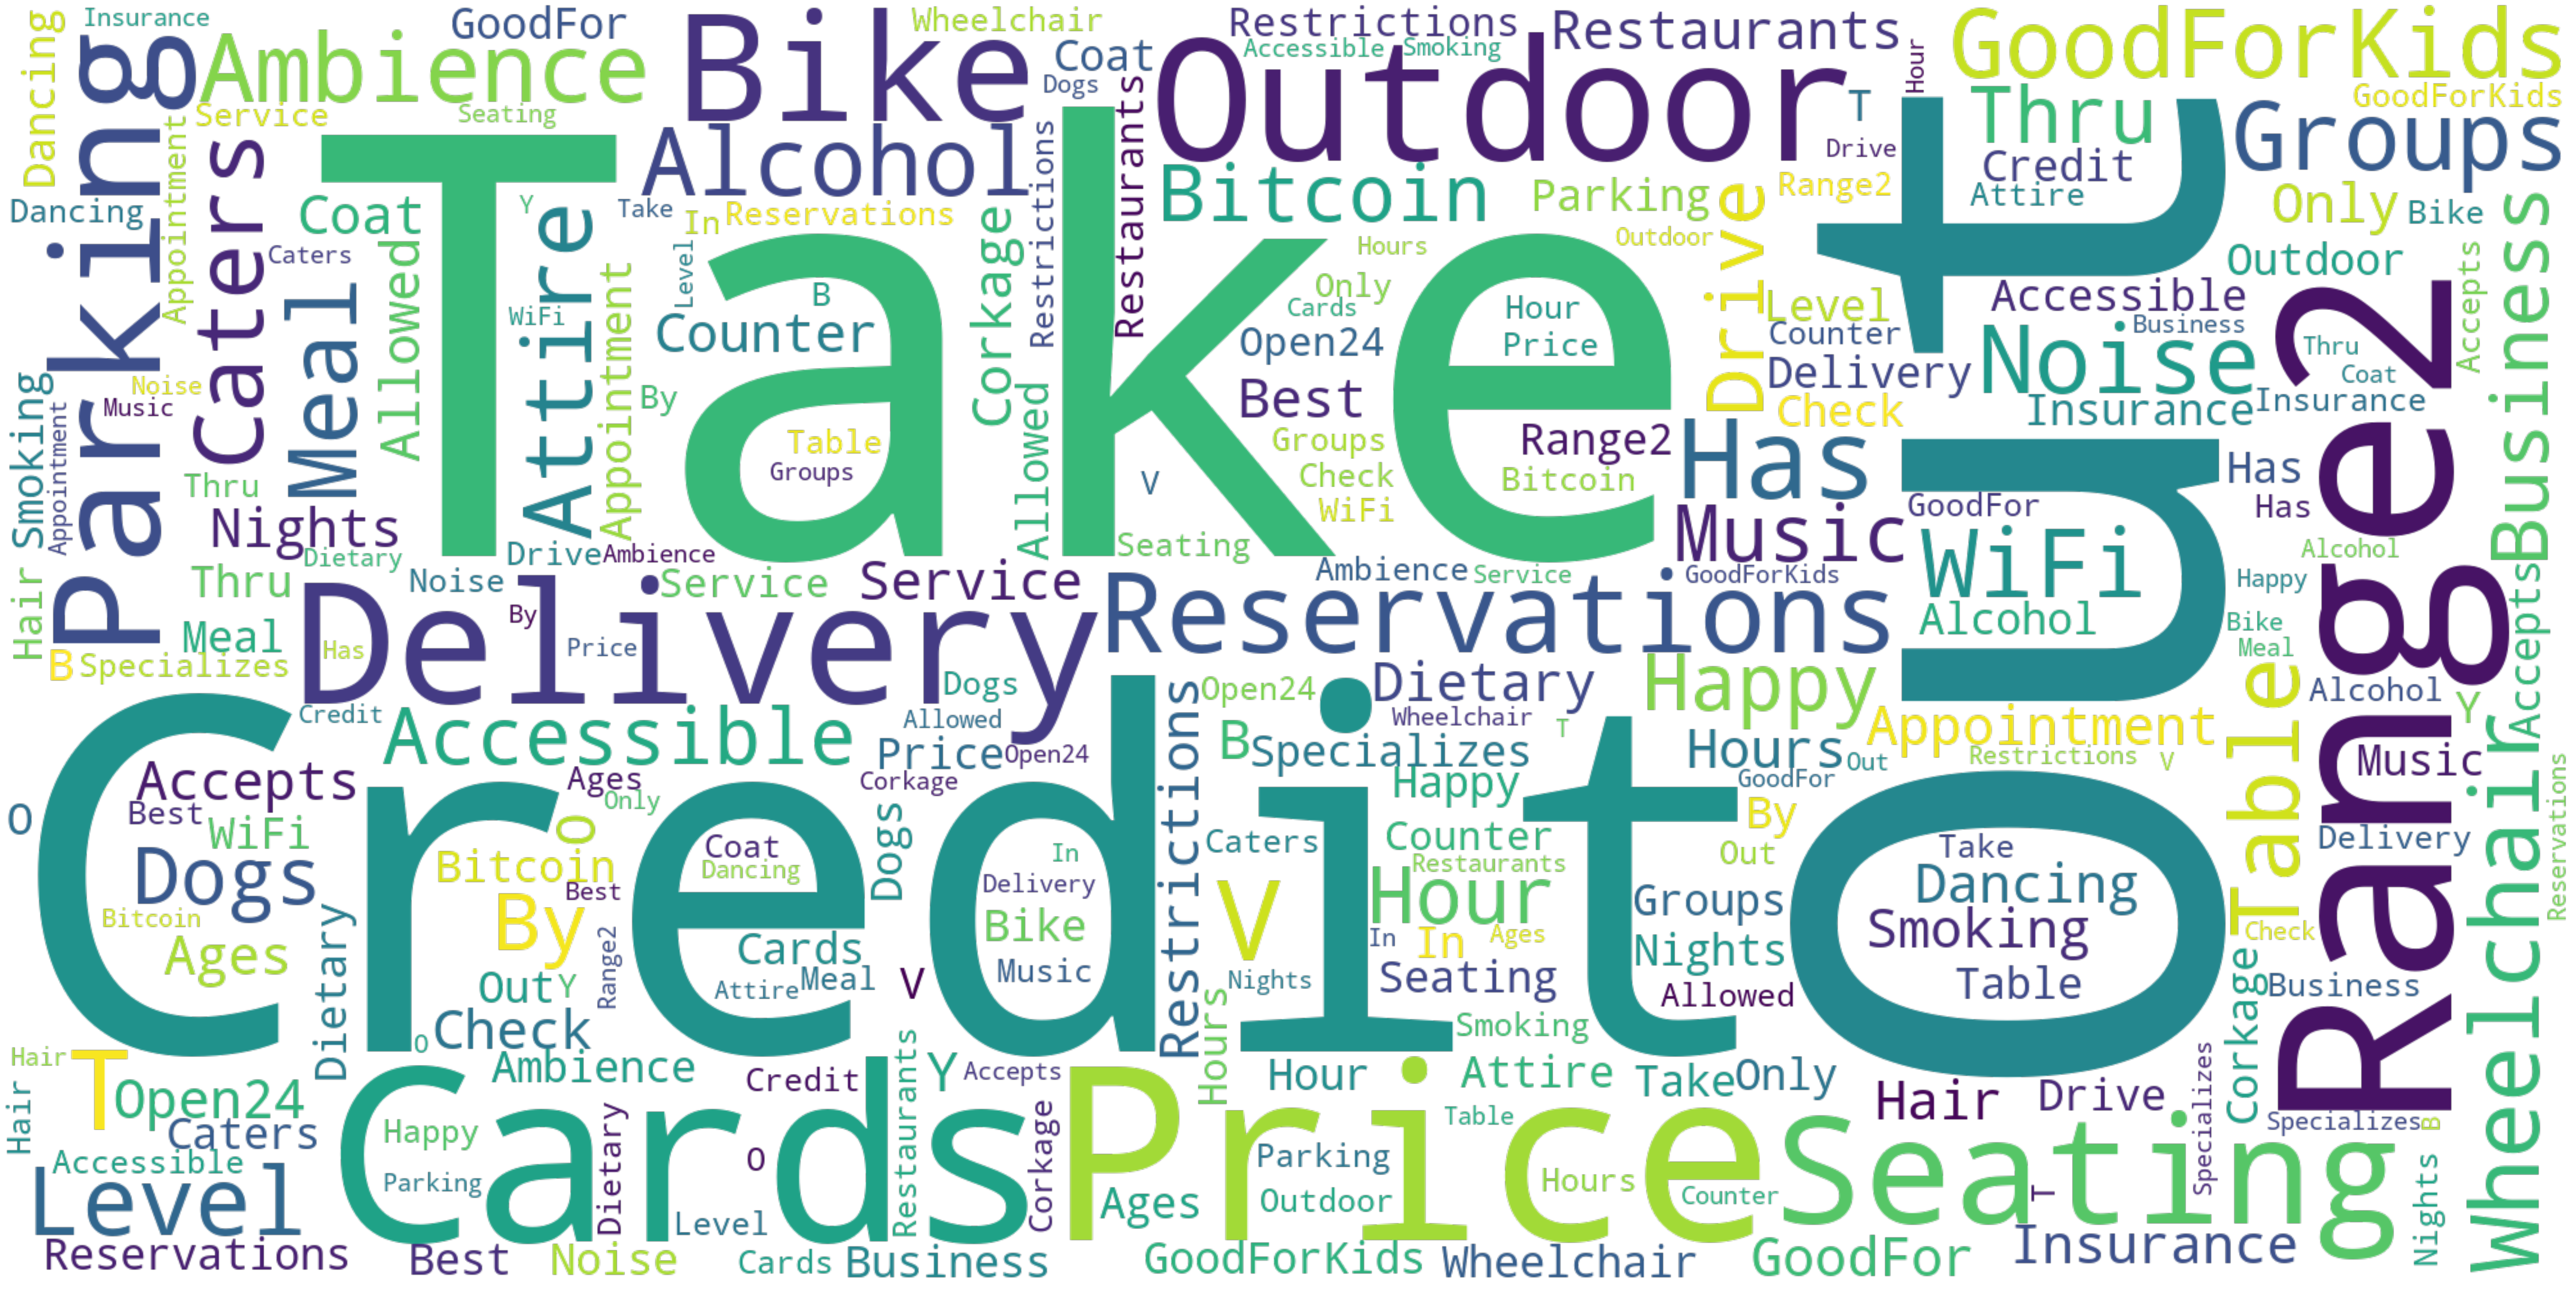

In [69]:
from PIL import Image
from wordcloud import WordCloud

# mask = np.array(Image.open('./MASK/hotel2.png'))

wc = WordCloud (width = 2000, height = 1000, repeat=True, mode="RGBA", background_color=None).generate_from_frequencies (new_dict)# difine wordcloud function from wordcloud library. set some parameteres for beatuful plotting
# declare our figure
plt.figure(figsize=(60,40))
# add title to the graph
# plt.title("Attraction", fontsize=40,color='white')
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
# after lot of congiguration finally plot the graph
plt.savefig('Hotels.png', transparent=True)
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Float64Index([1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0], dtype='float64')
[ 1986  4932  9527 14316 18453 26519 31125 27181 16307]


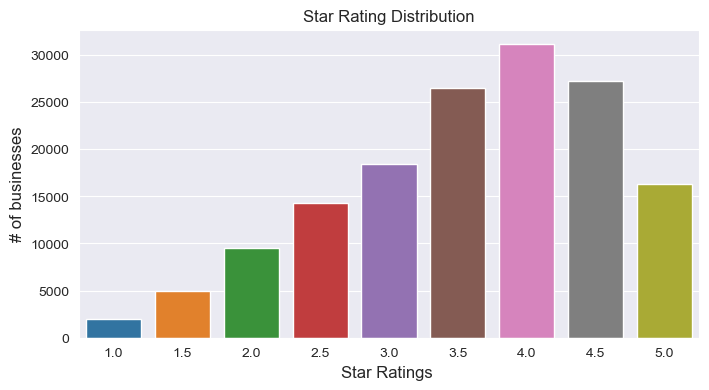

In [31]:
x=df['stars'].value_counts()
x=x.sort_index()
#plot
plt.figure(figsize=(8,4), facecolor="none") # change background color
ax= sns.barplot(x.index, x.values) # change bar color
print(x.index)
print(x.values)
plt.title("Star Rating Distribution")
plt.ylabel('# of businesses', fontsize=12)
plt.xlabel('Star Ratings ', fontsize=12)

plt.savefig('temp.png', transparent=True)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


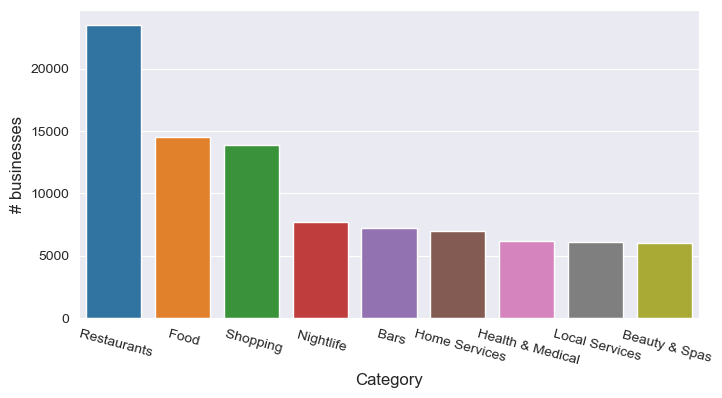

In [54]:
business_cats = ''.join(df['categories'].astype('str'))

cats=pd.DataFrame(business_cats.split(','),columns=['categories'])

#prep for chart
x=cats.categories.value_counts()

x=x.sort_values(ascending=False)
x=x.iloc[0:9]

#chart
plt.figure(figsize=(8,4),facecolor="none")
ax = sns.barplot(x.index, x.values)#,color=color[5])

locs, labels = plt.xticks()
plt.setp(labels, rotation=-15)
plt.ylabel('# businesses', fontsize=12)
plt.xlabel('Category', fontsize=12)

#adding the text labels
# rects = ax.patches
# labels = x.values
# for rect, label in zip(rects, labels):
#     height = rect.get_height()
#     ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

# plt.show()

plt.savefig('TopCategories.png', transparent=True)

In [6]:
 # Measures of central tendency for given data
df.describe()

latitude      longitude          stars   review_count  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       36.667424     -89.377957       3.597235      44.797370   
std         5.873946      14.916590       0.974157     115.331887   
min        27.555127    -120.095137       1.000000       5.000000   
25%        32.186827     -90.358516       3.000000       8.000000   
50%        38.773531     -86.122645       3.500000      15.000000   
75%        39.954097     -75.424966       4.500000      37.000000   
max        53.679197     -74.658572       5.000000    6093.000000   

             is_open  
count  100000.000000  
mean        0.796200  
std         0.402824  
min         0.000000  
25%         1.000000  
50%         1.000000  
75%         1.000000  
max         1.000000

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


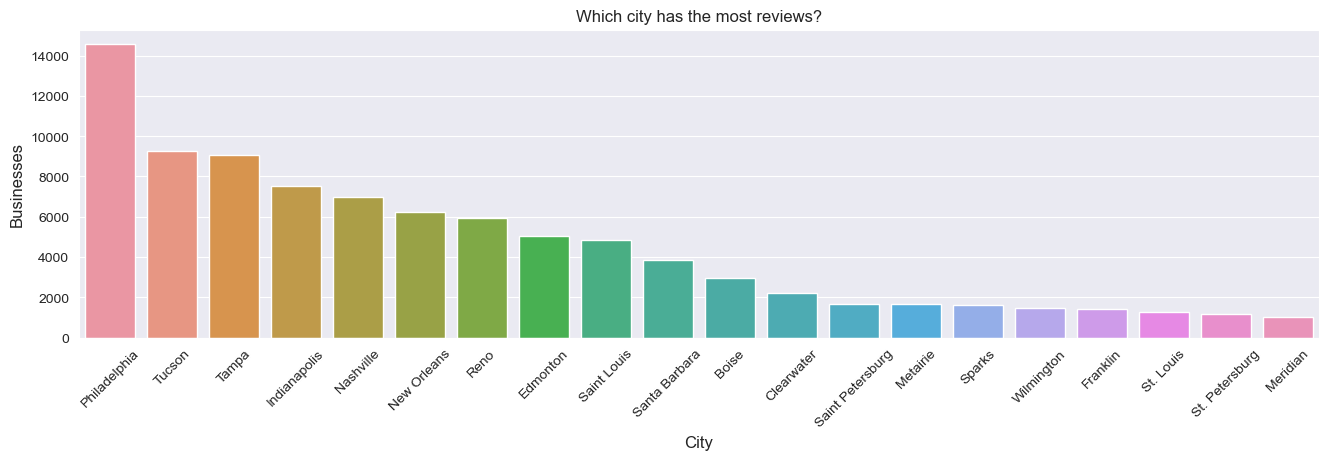

In [80]:
#Get the distribution of the ratings
x=df['city'].value_counts()
x=x.sort_values(ascending=False)
x=x.iloc[0:20]
plt.figure(figsize=(16,4), facecolor="none")
ax = sns.barplot(x.index, x.values)
plt.title("Which city has the most reviews?")
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.ylabel('Businesses', fontsize=12)
plt.xlabel('City', fontsize=12)

plt.savefig("CityReviews.png",transparent=True,bbox_inches = 'tight')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


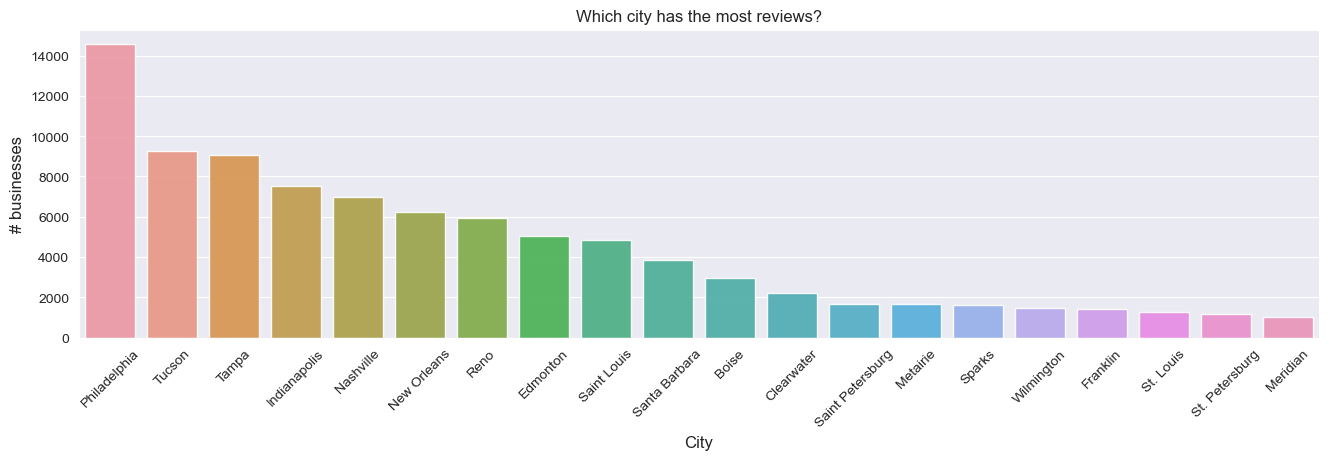

In [70]:
#Get the distribution of the ratings
x=df['city'].value_counts()
x=x.sort_values(ascending=False)
x=x.iloc[0:20]
plt.figure(figsize=(16,4),facecolor=none)
ax = sns.barplot(x.index, x.values, alpha=0.9 )
plt.title("Which city has the most reviews?")
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.ylabel('# businesses', fontsize=12)
plt.xlabel('City', fontsize=12)
plt.savefig('temp.png', transparent=True)

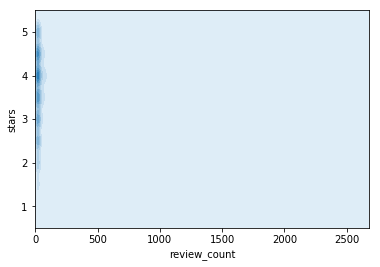

In [9]:
sns.kdeplot(df.sample(10000).review_count,df.sample(10000).stars,shade=True)

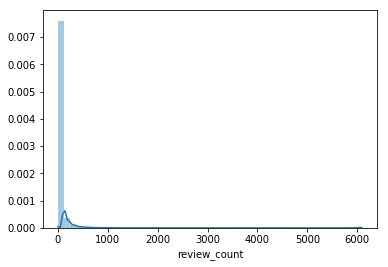

In [10]:
sns.distplot(df.review_count,kde=True,hist=True)

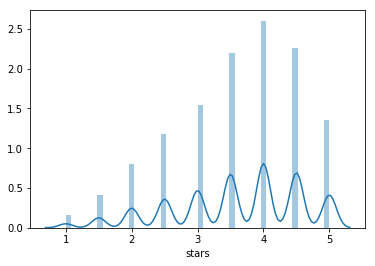

In [11]:
sns.distplot(df.stars,kde=True,hist=True)

references :- 
- https://www.kaggle.com/jagangupta/what-s-in-a-review-yelp-ratings-eda
- https://www.kaggle.com/sk3ptic/yelp-users-data-clustering-ida